### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split

### Load the Iris dataset by sklearn

In [8]:
from sklearn.datasets import load_iris

In [9]:
iris = load_iris()

In [11]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
df_features = pd.DataFrame(iris['data'], columns= iris['feature_names'])

In [15]:
df_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
df_target = pd.DataFrame(iris['target'], columns= ['species'])

In [17]:
df = pd.concat([df_features, df_target], axis= 1)

In [18]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


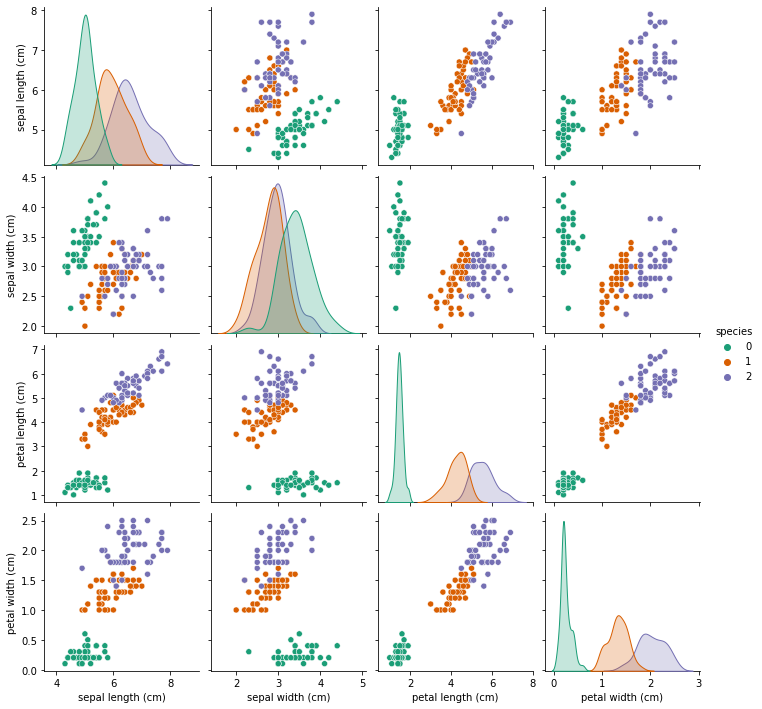

In [19]:
sns.pairplot(df, hue= 'species', palette= 'Dark2')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>

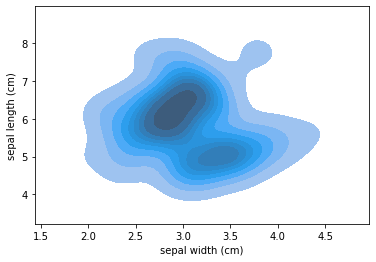

In [22]:
sns.kdeplot(df['sepal width (cm)'], df['sepal length (cm)'], shade= True)

In [23]:
setosa = df[df['species'] == 0]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>

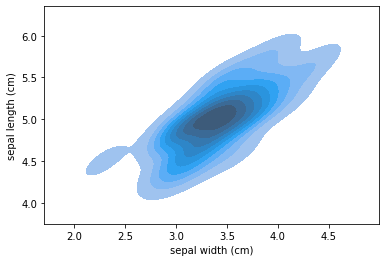

In [24]:
sns.kdeplot(setosa['sepal width (cm)'], setosa['sepal length (cm)'], shade= True)

<AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>

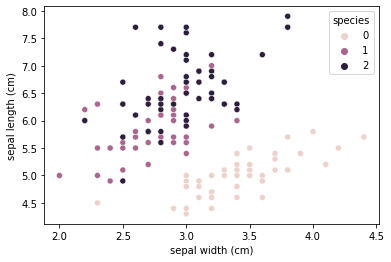

In [34]:
sns.scatterplot(x= 'sepal width (cm)', y= 'sepal length (cm)', hue= 'species', data= df)

<AxesSubplot:xlabel='species', ylabel='count'>

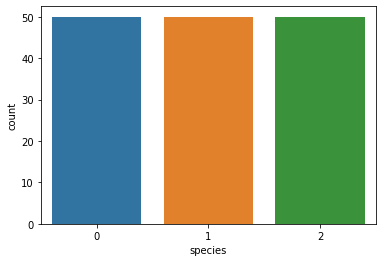

In [35]:
sns.countplot(x= 'species', data= df)

### Train Test Split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(df_features, np.ravel(df_target), test_size= 0.3, random_state= 42)

### Train model by using SVM

In [27]:
from sklearn.svm import SVC

In [28]:
svc = SVC()

In [29]:
svc.fit(x_train, y_train)

SVC()

### Model Evaluation

In [30]:
pred = svc.predict(x_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(confusion_matrix(y_test, pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [33]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

